In [62]:
import numpy as np
import matplotlib.pyplot as plt

Utilice el método **curve fit** de ***Python*** para obtener los dos ajustes. Compare con los
resultados anteriores.

In [63]:
from scipy.optimize import curve_fit

In [64]:
x2,y2 = np.loadtxt('/content/MinimosLineal.txt').T
x2,y2

(array([ 0.      ,  1.052632,  2.105263,  3.157895,  4.210526,  5.263158,
         6.315789,  7.368421,  8.421053,  9.473684, 10.52632 , 11.57895 ,
        12.63158 , 13.68421 , 14.73684 , 15.78947 , 16.84211 , 17.89474 ,
        18.94737 , 20.      ]),
 array([-4.786585 , -4.06587  ,  0.1796494,  2.719807 ,  2.878523 ,
         4.527426 ,  8.827734 , 10.97722  , 11.79944  , 14.52931  ,
        17.22463  , 21.0981   , 20.79109  , 26.08018  , 26.00302  ,
        30.14533  , 29.14247  , 33.28434  , 34.50524  , 36.56262  ]))

In [65]:
def f_2(x, a0, a1):
  return a0 + a1*x

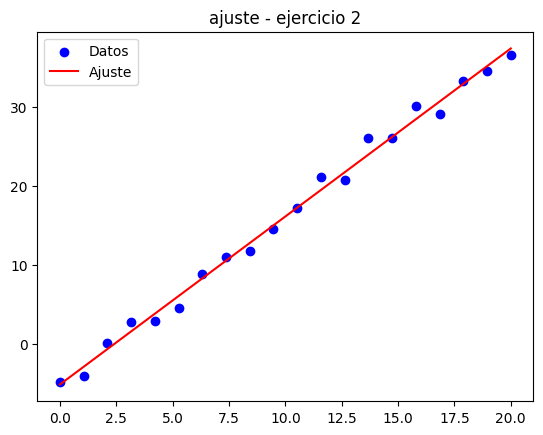

In [66]:
popt2, pcov2 = curve_fit(f_2, x2, y2, p0=[1, 1])
plt.scatter(x2, y2, label="Datos", color="blue")
plt.plot(x2, f_2(x2, *popt2), label="Ajuste", color="red")
plt.legend()
plt.title("ajuste - ejercicio 2")
plt.show()

In [67]:
x3,y3 = np.loadtxt('/content/MinimosCuadratico.txt').T
x3,y3

(array([ 0.       ,  0.5263158,  1.052632 ,  1.578947 ,  2.105263 ,
         2.631579 ,  3.157895 ,  3.684211 ,  4.210526 ,  4.736842 ,
         5.263158 ,  5.789474 ,  6.315789 ,  6.842105 ,  7.368421 ,
         7.894737 ,  8.421053 ,  8.947368 ,  9.473684 , 10.       ]),
 array([ -3.348886,  10.779   ,  13.12721 ,  21.20879 ,  20.63223 ,
         34.11089 ,  60.66644 ,  55.07888 ,  81.89598 ,  96.83438 ,
        117.5549  , 130.5394  , 147.7079  , 185.1728  , 210.7779  ,
        235.0856  , 266.336   , 297.0943  , 322.7923  , 352.3838  ]))

In [68]:
def f_3(x, a0, a1, a2):
  return a0 + a1*x + a2*x**2

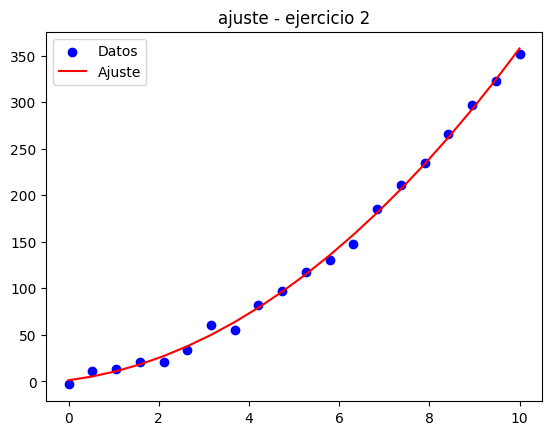

In [69]:
popt3, pcov3 = curve_fit(f_3, x3, y3, p0=[1, 1, 1])
plt.scatter(x3, y3, label="Datos", color="blue")
plt.plot(x3, f_3(x3, *popt3), label="Ajuste", color="red")
plt.legend()
plt.title("ajuste - ejercicio 2")
plt.show()

Al compara el el ajuste de curve fit, parece dar el mismo resultado que el de minimos cuadrados

6. En el caso de ajustes, es posible definir funciones de costo que midan la distancia entre
los puntos muestrales y el modelo de ajuste. En el caso de mínimos cuadrados la función
es $\chi^2$. Para $n$ puntos y un modelo lineal la función de costo es:

$$
    \chi^2(a_0,a_1) = \sum_{i=1}^{n} (y_i-(a_0 + a_1x_i))^2
$$
Si hablamos en terminos *Bayesianos*, $\Omega = \{a_0, a_1\}$ define el conjunto de modelos
lineales que pueden explicar los $n$ puntos muestrales. Al minimizar $\chi^2(a_0, a_1)$ muestre
(analíticamente) que los parámetros están dados por

$$
    a_0 = \overline{y}-a_1\overline{x}
$$
$$
    a_1 = \frac{\sum xy - \frac{\sum x \sum y}{n}}{\sum x^2 - \frac{(\sum x)^2}{n}}
$$
donde $\overline{x}$ y $\overline{y}$ son los valores medios de puntos y sus imágenes. Para $n$ puntos y un modelo cuadratico la función de costo es:

$$
    \chi^2(a_0,a_1,a_2) = \sum_{i=1}^{n} (y_i - (a_0-a_1x_i + a_2x_i^2))^2
$$

Parte 1: Si se tiene que:
$$
    \chi^2(a_0,a_1) = \sum_{i=1}^{n} (y_i-(a_0 + a_1x_i))^2
$$
podemos derivar con respecto a $a_0$ y con respecto a $a_1$, teniendo como resultado:
$$
    \frac{\partial\chi^2}{\partial a_0} = -2\sum_{i=1}^{n}(y_i-(a_0 + a_1x_i)) = 0
$$
$$
    \frac{\partial\chi^2}{\partial a_1} = -2\sum_{i=1}^{n}x_i(y_i-(a_0 + a_1x_i)) = 0
$$

por definición $\overline{x} = \frac{1}{n}\sum x_i,\; \overline{y} = \frac{1}{n}\sum y_i$ por lo cual se puede rescribir las ecuaciones para encontrar $a_0$ y $a_1$:

$"a_0":$
\begin{align*}
     &\rightarrow n\overline{y}-na_0+na_1\overline{x} = 0\\
     &\Rightarrow a_0= \overline{y} - a_1\overline{x}
\end{align*}
$"a_1":$
\begin{align*}
     &\rightarrow \sum_{i=1}^{n}x_iy_i - a_0\sum_{i=1}^{n}x_i - a_1\sum_{i=1}^{n}x_i^2= 0\\
     &\Rightarrow a_1\sum_{i=1}^{n}x_i^2 = \sum_{i=1}^{n}x_iy_i - a_0\sum_{i=1}^{n}x_i\\
     &\Rightarrow a_1\sum_{i=1}^{n}x_i^2 = \sum_{i=1}^{n}x_iy_i - (\frac{1}{n}\sum_{i=1}^{n}y_i - \frac{a_1}{n}\sum_{i=1}^{n}x_i)\sum_{i=1}^{n}x_i\\
     &\Rightarrow a_1\sum_{i=1}^{n}x_i^2 = \sum_{i=1}^{n}x_iy_i - \frac{1}{n}\sum_{i=1}^{n}y_i\sum_{i=1}^{n}x_i + \frac{a_1}{n}\left(\sum_{i=1}^{n}x_i\right)^2\\
     &\Rightarrow a_1\left[\sum_{i=1}^{n}x_i^2 - \frac{1}{n}\left(\sum_{i=1}^{n}x_i\right)^2\right]= \sum_{i=1}^{n}x_iy_i - \frac{1}{n}\sum_{i=1}^{n}y_i\sum_{i=1}^{n}x_i\\
     &\Rightarrow a_1= \frac{\sum_{i=1}^{n}x_iy_i - \frac{\sum_{i=1}^{n}y_i\sum_{i=1}^{n}x_i}{n}}{\sum_{i=1}^{n}x_i^2 - \frac{\left(\sum_{i=1}^{n}x_i\right)^2}{n}}
\end{align*}

Al expandir la función de costo, obtenemos:

\begin{align*}
\chi^2(a_0, a_1, a_2) &= \sum_{i=1}^{n} \left( y_i^2 - 2y_i(a_0 + a_1 x_i + a_2 x_i^2) + (a_0 + a_1 x_i + a_2 x_i^2)^2 \right) \\
&= \sum_{i=1}^{n} y_i^2 - 2 \sum_{i=1}^{n} y_i(a_0 + a_1 x_i + a_2 x_i^2) + \sum_{i=1}^{n} (a_0 + a_1 x_i + a_2 x_i^2)^2
\end{align*}

derivando con respecto a $a_0, a_1, a_2$

**$a_0$**
\begin{equation}
\frac{\partial \chi^2}{\partial a_0} = -2 \sum_{i=1}^{n} (y_i - (a_0 + a_1 x_i + a_2 x_i^2)) = 0
\end{equation}

\begin{equation}
\sum_{i=1}^{n} y_i = n a_0 + a_1 \sum_{i=1}^{n} x_i + a_2 \sum_{i=1}^{n} x_i^2
\end{equation}

\begin{equation}
a_0 = \frac{1}{n} \sum_{i=1}^{n} y_i - \frac{a_1}{n} \sum_{i=1}^{n} x_i - \frac{a_2}{n} \sum_{i=1}^{n} x_i^2
\end{equation}

**$a_1$**
\begin{equation}
\frac{\partial \chi^2}{\partial a_1} = -2 \sum_{i=1}^{n} x_i (y_i - (a_0 + a_1 x_i + a_2 x_i^2)) = 0
\end{equation}

\begin{equation}
\sum_{i=1}^{n} x_i y_i = a_0 \sum_{i=1}^{n} x_i + a_1 \sum_{i=1}^{n} x_i^2 + a_2 \sum_{i=1}^{n} x_i^3
\end{equation}

\begin{equation}
\sum_{i=1}^{n} x_i y_i = n \bar{y} \bar{x} - n a_1 \bar{x}^2 - n a_2 \bar{x} \bar{x^2} + a_1 \sum_{i=1}^{n} x_i^2 + a_2 \sum_{i=1}^{n} x_i^3
\end{equation}

**$a_2$**
\begin{equation}
\frac{\partial \chi^2}{\partial a_2} = -2 \sum_{i=1}^{n} x_i^2 (y_i - (a_0 + a_1 x_i + a_2 x_i^2)) = 0
\end{equation}

\begin{equation}
\sum_{i=1}^{n} x_i^2 y_i = a_0 \sum_{i=1}^{n} x_i^2 + a_1 \sum_{i=1}^{n} x_i^3 + a_2 \sum_{i=1}^{n} x_i^4
\end{equation}

Resolviendo el sistema de ecuaciones

\begin{equation}
A \begin{pmatrix}
a_0 \\
a_1 \\
a_2
\end{pmatrix} = \begin{pmatrix}
\sum_{i=1}^{n} y_i \\
\sum_{i=1}^{n} x_i y_i \\
\sum_{i=1}^{n} x_i^2 y_i
\end{pmatrix}
\end{equation}

Donde:
$$
A = \begin{pmatrix}
n & \sum x_i & \sum x_i^2 \\
\sum x_i & \sum x_i^2 & \sum x_i^3 \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4
\end{pmatrix}
$$

In [112]:
def minimize (x, y):
    n = len(x)
    Sum_x = np.sum(x)
    Sum_y = np.sum(y)
    Sum_x2 = np.sum(x**2)
    Sum_x3 = np.sum(x**3)
    Sum_x4 = np.sum(x**4)
    Sum_xy = np.sum(x * y)
    Sum_x2y = np.sum(x**2 * y)


    A = np.array([[n, Sum_x, Sum_x2],
                [Sum_x, Sum_x2, Sum_x3],
                [Sum_x2, Sum_x3, Sum_x4]])

    b = np.array([Sum_y, Sum_xy, Sum_x2y])

    return np.linalg.solve(A, b)

In [114]:
a0, a1, a2 = minimize(x2, y2)
a0, a1, a2

(-5.452822324643682, 2.2275217886094345, -0.005124248749379709)

In [113]:
a0, a1, a2 = minimize(x3, y3)
a0, a1, a2

(1.2213205361704154, 6.090752046362295, 2.9565874017738634)

7.  Calcule  la  proyección  ortogonal  del  vector $\vec{b}=  (-3,-3,8,9)$  sobre  el  sub-espacio $W$ generado por los vectores:

$$
    \vec{u}_1 = (3,1,0,1)
$$
$$
    \vec{u}_2 = (1,2,1,1)
$$
$$
    \vec{u}_3 = (-1,0,2,-1)
$$

In [70]:
b = np.array([-3,-3,8,9]).T
u1 = np.array([3,1,0,1])
u2 = np.array([1,2,1,1])
u3 = np.array([-1,0,2,-1])
A=np.array([u1,u2,u3]).T
A

array([[ 3,  1, -1],
       [ 1,  2,  0],
       [ 0,  1,  2],
       [ 1,  1, -1]])

a) Usando mínimos cuadrados matriciales. La proyección ortogonal es $p_W(\vec{b}) = A\vec{x}$, donde las columnas de $A$ son los vectores base y $\vec{x}$ es la solución de mínimos cuadrados.

In [71]:
def proy(A,b):

  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  x = np.linalg.solve(AT,bT)

  return np.dot(A,x)

In [72]:
proy(A,b)

array([-2.0000000e+00,  3.0000000e+00,  4.0000000e+00, -4.4408921e-16])


b) Con el proceso de *Grand-Schmidt* obtener una base ortonormal $(v_1, v_2, v_3)$ y luego calcular la proyección sobre dicha base: $p_W(b) = c_1v_1 + c_2v_2 + c_3v_3$, donde $c_i = <b,v_i>$ para $1,2,3$. Respuesta: $p_W(b) = (-2,3,4,0)$

Recuerde que el procedimiento de *Grand-Schimidt* es:

$$
    u_k = v_k - \sum_{j=1}^{k-1}\frac{<v_k,u_j>}{<u_j,u_j>}u_j.
$$

In [73]:
import numpy as np

def GramSchmidt(A, n=3):
    base_ortogonal = np.zeros_like(A, dtype=float)

    u_1 = A.T[0].copy()
    norma_u1 = np.linalg.norm(u_1)

    if norma_u1 != 0:
        base_ortogonal.T[0] = u_1 / norma_u1
    else:
        raise ValueError("division por 0")


    for k in range(1, n):
        suma = 0
        for j in range(k):
            denominador = np.dot(base_ortogonal.T[j], base_ortogonal.T[j])
            if denominador != 0:
                suma += (np.dot(A.T[k], base_ortogonal.T[j]) / denominador) * base_ortogonal.T[j]

        u_k = A.T[k] - suma
        norma_u_k = np.linalg.norm(u_k)

        if norma_u_k != 0:
            base_ortogonal.T[k] = u_k / norma_u_k
        else:
            raise ValueError("division por 0")

    return base_ortogonal


In [74]:
V = GramSchmidt(A)

In [75]:
proy = np.zeros(4)
v1 = V.T[0]
v2 = V.T[1]
v3 = V.T[2]

c1 = np.dot(b, v1)
c2 = np.dot(b, v2)
c3 = np.dot(b, v3)

proy = c1*v1 + c2*v2 + c3*v3
proy


array([-2.00000000e+00,  3.00000000e+00,  4.00000000e+00,  3.33066907e-16])

Extra:

Encontrar la configuración que adopta un sistema de $N=50$ partículas que interacutan con un potencial de **lennar Jonnes**. Use el algoritmo genético para minimizar la energía total del sistema: Use la siguiente definición de potencial y de energía: (Estos no son métodos de clase , Cuidado!)

In [76]:
def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, H = 0, epsilon=1, sigma=1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            ra = np.linalg.norm(positions[i].GetR() - positions[j].GetR())  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(ra, epsilon, sigma)
    return energy

In [77]:
from IPython.display import clear_output
import time
import copy

In [104]:
class Robot:

  def __init__(self, f, Id=0):

    self.Id = Id
    self.f = f

    self.r = np.random.uniform(-10,10, size=3)

  # Getter de clase: Me da la posicion del robot
  def GetR(self):
    return self.r

  # Buscamos la posibilidad de mejorar (Mutar)
  def Mutate(self):
    # Cambiar el lugar donde estoy aleatoriamente
    #self.r += np.random.uniform(-0.001,0.001)
    self.r += np.random.normal(loc=0,scale=1., size=3)

  def SetFitness(self, positions, epsilon=1, sigma=1):
        h = 1e-2
        energia_actual = TotalEnergy(positions, epsilon, sigma)
        posiciones_adelante = positions.copy()
        posiciones_atras = positions.copy()

        posiciones_adelante[self.Id].r = self.r + h
        posiciones_atras[self.Id].r = self.r - h

        energia_adelante = TotalEnergy(posiciones_adelante, epsilon, sigma)
        energia_atras = TotalEnergy(posiciones_atras, epsilon, sigma)

        derivada = (energia_adelante - energia_atras) / (2 * h)
        self.fitness = np.abs(derivada) + 0.1

  @property
  def Fitness(self):
    return self.fitness

  def __repr__(self):
    return f"Robot {self.Id}"

In [105]:
robot_prueba = Robot(TotalEnergy)
print(robot_prueba.GetR())
robot_prueba.Mutate()
print(robot_prueba.GetR())

[-1.22351158  3.93836112 -5.68986582]
[-1.62975497  5.41818028 -6.3594438 ]


In [106]:
def GetRobots(N):

  Robots = []

  for i in range(N):
    r = Robot(TotalEnergy,i)
    Robots.append(r)

  return Robots

In [107]:
Robots = GetRobots(50)
for r in Robots:
  print(r.GetR())

[-8.78812704  7.70978511  3.96771314]
[ 5.54197261 -6.22682203 -4.59264932]
[-4.55066793 -0.86590292 -4.13551838]
[-4.73140618 -9.34083211 -3.14791154]
[-6.7935345   4.14927309 -5.20962886]
[ 5.5191854  -1.07490658 -3.82016726]
[ 2.52773863  5.24081016 -7.03591358]
[-9.60112123  0.65027928 -0.02448126]
[-3.86117175  1.777935    6.09680889]
[-7.14283288 -2.21240582  7.1375506 ]
[ 7.2240284  -3.15443735  7.05746266]
[-7.7041045   2.01056904 -1.85253024]
[ 4.72888718 -1.64075216 -1.3479018 ]
[ 9.40491501 -7.75084611 -3.38677794]
[-3.35472967 -3.41187188  8.35979284]
[-1.1620924  -9.36098308  3.44661719]
[-0.74893435  5.99616273 -1.5033722 ]
[-8.34125069  7.52922408  3.44735564]
[-5.54011072 -0.49470094  4.17983275]
[ 1.83802443 -0.01172307 -0.06651331]
[-4.04718752  7.85438945 -3.58788697]
[-5.53834661  5.99019861  9.94199529]
[-7.6910663  -5.15303136  8.03980064]
[-0.24725071  2.25192785  6.62676554]
[5.23981739 4.51591918 6.62265672]
[ 7.41245677  9.89810771 -2.0235844 ]
[ 2.85659844 -5

In [108]:
from mpl_toolkits.mplot3d import Axes3D

In [109]:
def Scatter(e, positions):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5, 5))
    ax.set_title('Epoch: {:.0f}'.format(e), fontsize=10)

    for robot in positions:
        pos = robot.GetR()
        ax.scatter(pos[0], pos[1], pos[2], s=50)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
    return fig, ax

In [110]:
def Genetic(Robots, epochs=30):
    N = int(0.9 * len(Robots))

    for e in range(epochs):
        clear_output(wait=True)
        _, ax = Scatter(e, Robots)

        # Mutar y calcular fitness
        for p in Robots:
            p.Mutate()
            p.SetFitness(positions=Robots)

        # Medir fitness
        score = [(p.Fitness, p) for p in Robots]
        score = sorted(score, key=lambda x: x[0], reverse=False)

        Temp = [r[1] for i, r in enumerate(score) if i < N]

        # Reintroducción aleatoria
        for i in range(int(0.1 * len(Robots))):
            Robots[i] = Robot(TotalEnergy, i)

        # Reemplazo de robots más aptos
        for i, r in enumerate(Robots):
            j = i % N
            Robots[i] = copy.deepcopy(Temp[j])

        # Pintar los robots
        for p in Robots:
            pos = p.GetR()  # Obtener la posición
            ax.scatter(*pos, marker='o', s=50)

        plt.show()

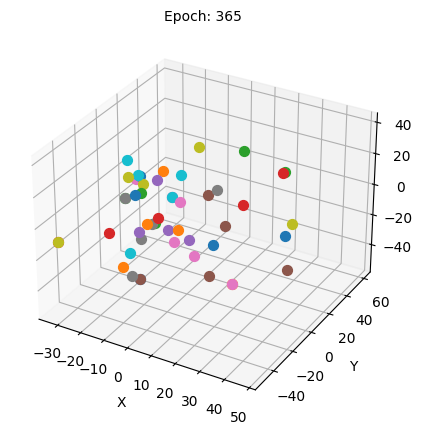

KeyboardInterrupt: 

In [111]:
Genetic(Robots, epochs=1000)